In [2]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(scales)
library(NICHES)
library(stringr)
library(reshape2)
library(cowplot)

In [3]:
options(warn=-1)

In [4]:
female_8weeks_rds <- readRDS('../combined_female_8weeks.rds')

In [5]:
data.list <- SplitObject(female_8weeks_rds, split.by="sample_type")

In [6]:
data.list[1]
data.list[2]

$taPVAT_Control_8W_F
An object of class Seurat 
20743 features across 6314 samples within 1 assay 
Active assay: RNA (20743 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap


$taPVAT_HF_8W_F
An object of class Seurat 
20743 features across 9151 samples within 1 assay 
Active assay: RNA (20743 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap


In [7]:
table(data.list[[1]]@meta.data['celltype_broad'])
table(data.list[[2]]@meta.data['celltype_broad'])

celltype_broad
       Adipocytes Endothelial_Cells       Fibroblasts      Immune_Cells 
             3789               710               798               491 
Mesothelial_Cells    Neuronal_Cells         Pericytes              SMCs 
              321                14               180                11 

celltype_broad
       Adipocytes Endothelial_Cells       Fibroblasts      Immune_Cells 
             6075               967               976               529 
Mesothelial_Cells    Neuronal_Cells         Pericytes              SMCs 
              375                 7               211                11 

In [8]:
max.cells <- min(ncol(data.list[[1]]),ncol(data.list[[2]])) 

for (i in 1:length(data.list)){
  Idents(data.list[[i]]) <- data.list[[i]]$sample_type
  data.list[[i]] <- subset(data.list[[i]],cells = WhichCells(data.list[[i]],downsample = max.cells))
  Idents(data.list[[i]]) <- data.list[[i]]$celltype_broad
}


In [9]:
max.cells

[1] 6314

In [10]:
distribution <- data.frame(CTRL = table(Idents(data.list[[1]])),
                            HF = table(Idents(data.list[[2]])))
distribution <- reshape2::melt(distribution)

Using CTRL.Var1, HF.Var1 as id variables



In [11]:
distribution

CTRL.Var1         HF.Var1           variable  value
1  Adipocytes        Adipocytes        CTRL.Freq 3789 
2  Fibroblasts       Endothelial_Cells CTRL.Freq  798 
3  Endothelial_Cells Fibroblasts       CTRL.Freq  710 
4  Immune_Cells      Immune_Cells      CTRL.Freq  491 
5  Pericytes         Pericytes         CTRL.Freq  180 
6  Mesothelial_Cells Mesothelial_Cells CTRL.Freq  321 
7  SMCs              Neuronal_Cells    CTRL.Freq   11 
8  Neuronal_Cells    SMCs              CTRL.Freq   14 
9  Adipocytes        Adipocytes        HF.Freq   4188 
10 Fibroblasts       Endothelial_Cells HF.Freq    670 
11 Endothelial_Cells Fibroblasts       HF.Freq    684 
12 Immune_Cells      Immune_Cells      HF.Freq    365 
13 Pericytes         Pericytes         HF.Freq    136 
14 Mesothelial_Cells Mesothelial_Cells HF.Freq    259 
15 SMCs              Neuronal_Cells    HF.Freq      6 
16 Neuronal_Cells    SMCs              HF.Freq      6

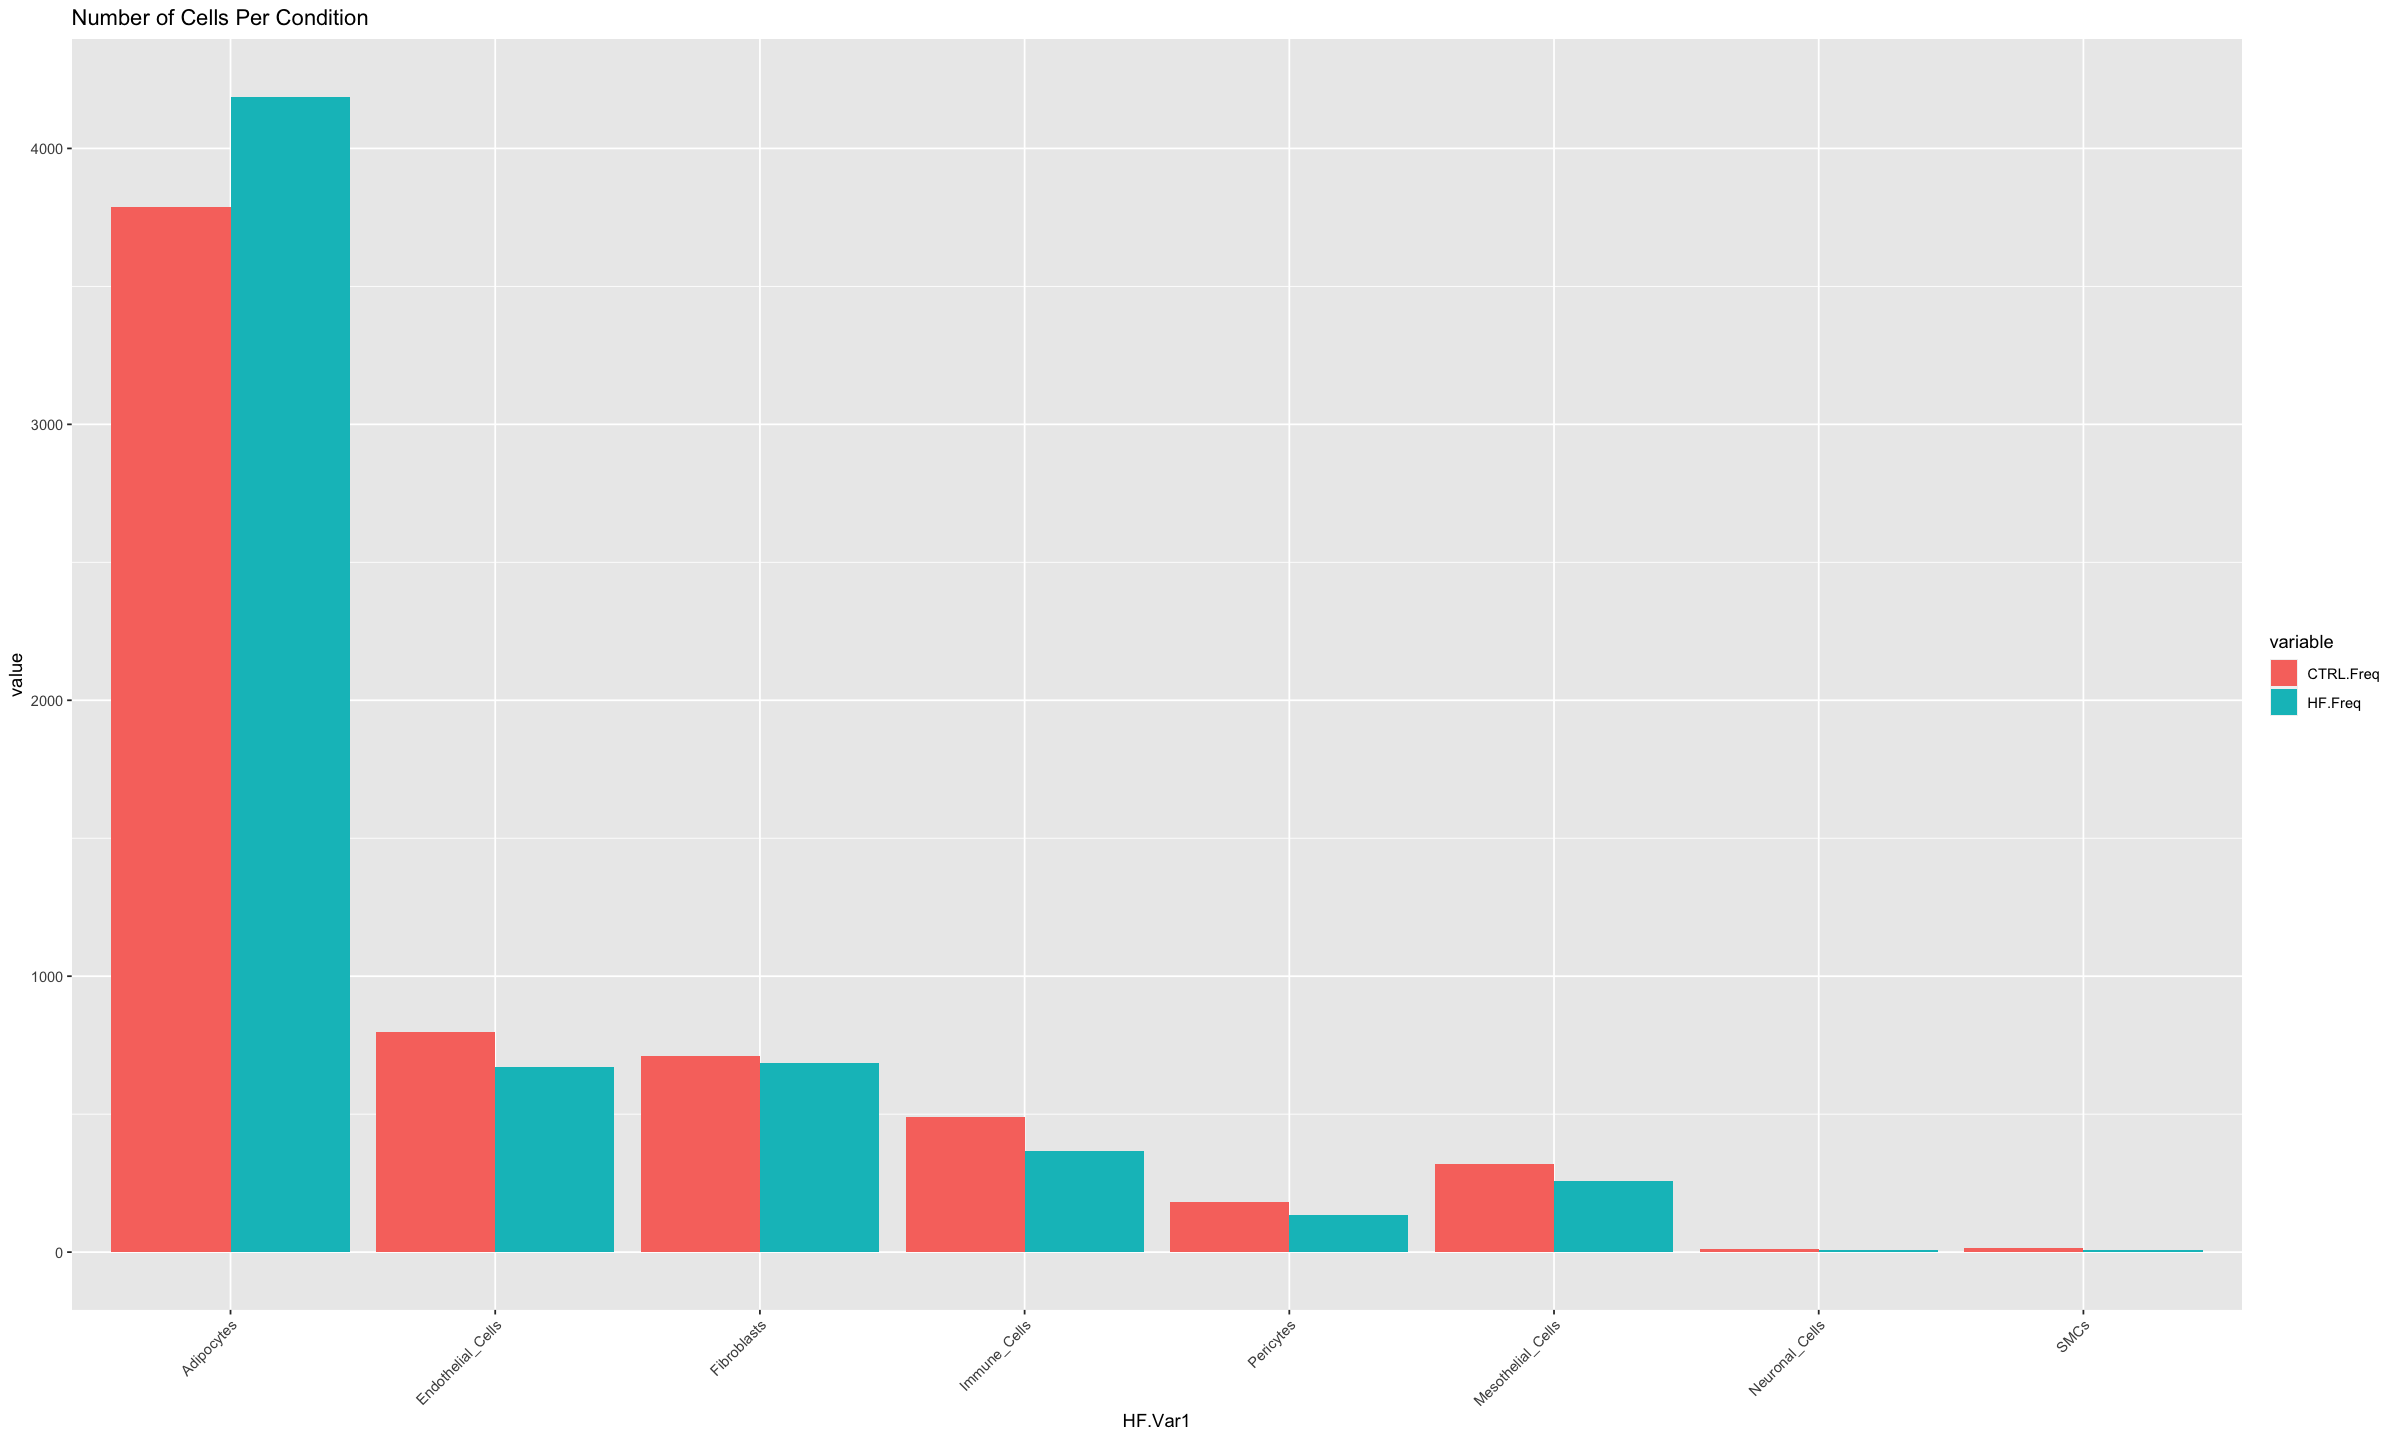

In [12]:
options(repr.plot.width=20, repr.plot.height=12)

ggplot(data = distribution,aes(x = HF.Var1,y=value,fill = variable))+geom_bar(stat='identity',position='dodge')+
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+
  ggtitle('Number of Cells Per Condition')

In [13]:
ncol(data.list[[1]])==ncol(data.list[[2]])

[1] TRUE

In [14]:
table(data.list[[1]]@meta.data['celltype_broad'])
table(data.list[[2]]@meta.data['celltype_broad'])

celltype_broad
       Adipocytes Endothelial_Cells       Fibroblasts      Immune_Cells 
             3789               710               798               491 
Mesothelial_Cells    Neuronal_Cells         Pericytes              SMCs 
              321                14               180                11 

celltype_broad
       Adipocytes Endothelial_Cells       Fibroblasts      Immune_Cells 
             4188               670               684               365 
Mesothelial_Cells    Neuronal_Cells         Pericytes              SMCs 
              259                 6               136                 6 

In [15]:
# Run NICHES on each system and store/name the outputs
scc.list <- list()
for(i in 1:length(data.list)){
  print(i)
  scc.list[[i]] <- RunNICHES(data.list[[i]],
                             LR.database="fantom5",
                             species="mouse",
                             assay="RNA",
                             cell_types = 'celltype_broad',
                             min.cells.per.ident=1,
                             min.cells.per.gene = 50,
                             meta.data.to.map = c('orig.ident','celltype_broad','sample_type'),
                             SystemToCell = T,
                             CellToCell = T,
                             blend = 'mean')
}
names(scc.list) <- names(data.list)

[1] 1


Set cell types as Identity of object internally


 Subsetting to populations with greater than 1 cells


 Subsetting to genes expressed in greater than 50 cells


 6314 distinct cells from 8 celltypes to be analyzed


 Limiting ground truth to genes within dataset


 Mapping against 721 ground truth signaling mechanisms


 For sampling purposes, please make sure that the active Identity of the input seurat object corresponds to cell types

Normalizing layer: counts


 18386 Cell-To-Cell edges computed, sampling 64 distinct VectorTypes, out of 64 total possible

Normalizing layer: counts


 6314 System-To-Cell edges were computed, across 8 cell types



[1] 2


Set cell types as Identity of object internally


 Subsetting to populations with greater than 1 cells


 Subsetting to genes expressed in greater than 50 cells


 6314 distinct cells from 8 celltypes to be analyzed


 Limiting ground truth to genes within dataset


 Mapping against 635 ground truth signaling mechanisms


 For sampling purposes, please make sure that the active Identity of the input seurat object corresponds to cell types

Normalizing layer: counts


 16140 Cell-To-Cell edges computed, sampling 64 distinct VectorTypes, out of 64 total possible

Normalizing layer: counts


 6314 System-To-Cell edges were computed, across 8 cell types



In [16]:
scc.list

$taPVAT_Control_8W_F
$taPVAT_Control_8W_F$CellToCell
An object of class Seurat 
721 features across 18386 samples within 1 assay 
Active assay: CellToCell (721 features, 0 variable features)
 2 layers present: counts, data

$taPVAT_Control_8W_F$SystemToCell
An object of class Seurat 
721 features across 6314 samples within 1 assay 
Active assay: SystemToCell (721 features, 0 variable features)
 2 layers present: counts, data


$taPVAT_HF_8W_F
$taPVAT_HF_8W_F$CellToCell
An object of class Seurat 
635 features across 16140 samples within 1 assay 
Active assay: CellToCell (635 features, 0 variable features)
 2 layers present: counts, data

$taPVAT_HF_8W_F$SystemToCell
An object of class Seurat 
635 features across 6314 samples within 1 assay 
Active assay: SystemToCell (635 features, 0 variable features)
 2 layers present: counts, data



In [17]:
temp.list <- list()
for(i in 1:length(scc.list)){
temp.list[[i]] <- scc.list[[i]]$SystemToCell # Isolate SystemToCell Signaling, which is all that will be covered in this vignette
temp.list[[i]]$Condition <- names(scc.list)[i] # Tag with metadata
}

In [18]:
temp.list[[1]]@meta.data

orig.ident    nCount_SystemToCell
System—AAACGAACATCCGGCA-1-13 SeuratProject  26.59557          
System—AAAGAACAGGTTAAAC-1-13 SeuratProject  46.60582          
System—AAAGGATGTATTAAGG-1-13 SeuratProject  39.80066          
System—AAAGGATTCGTCCATC-1-13 SeuratProject  63.09582          
System—AAAGGTACACTTGTCC-1-13 SeuratProject  19.72298          
System—AAAGGTACATCACAGT-1-13 SeuratProject  85.39324          
System—AAAGGTAGTTCTAAGC-1-13 SeuratProject  64.87975          
System—AAAGTCCAGAAACTAC-1-13 SeuratProject  14.40045          
System—AAAGTCCGTGTGAGCA-1-13 SeuratProject  60.08443          
System—AAAGTCCTCTCTATAC-1-13 SeuratProject  63.40532          
System—AAAGTGAGTAATTGGA-1-13 SeuratProject  41.75357          
System—AAAGTGAGTGCGTGCT-1-13 SeuratProject 111.21075          
System—AAATGGACATGACACT-1-13 SeuratProject  95.34762          
System—AAATGGATCGTGTGGC-1-13 SeuratProject  43.21457          
System—AAATGGATCTCGTGAA-1-13 SeuratProject  56.46161          
System—AACAAAGTCTCATTAC-1-13 SeuratProject  29.93452          
System—AACAACCGTACTGCGC-1-13 SeuratProject  65.34260          
System—AACAAGATCTCCCAAC-1-13 SeuratProject  57.56485          
System—AACACACGTTTAAGGA-1-13 SeuratProject  15.47318          
System—AACCAACTCGATTGGT-1-13 SeuratProject  54.37921          
System—AACCCAACAGGAAGTC-1-13 SeuratProject  77.52578          
System—AACCCAAGTTGCATAC-1-13 SeuratProject  39.26156          
System—AACCTGATCAGCTAGT-1-13 SeuratProject  52.86656          
System—AACCTTTTCAAGGTGG-1-13 SeuratProject  59.57542          
System—AACCTTTTCTACCAGA-1-13 SeuratProject  70.62482          
System—AACGAAAGTCTAACGT-1-13 SeuratProject  14.65044          
System—AACGGGAAGCTCTGTA-1-13 SeuratProject  16.20973          
System—AACGTCACATCCCACT-1-13 SeuratProject  51.53870          
System—AACGTCATCCTACACC-1-13 SeuratProject  63.35917          
System—AACTTCTAGACTTCGT-1-13 SeuratProject  68.00575          
⋮                            ⋮             ⋮                  
System—TTTATGCCATAGGTTC-1-20 SeuratProject 57.59382           
System—TTTATGCCATGTTCGA-1-20 SeuratProject 86.89792           
System—TTTATGCTCTACCCAC-1-20 SeuratProject 22.51323           
System—TTTCACAAGATAGCAT-1-20 SeuratProject 15.44959           
System—TTTCACAAGGTGGGTT-1-20 SeuratProject 52.79036           
System—TTTCACAAGTAAGACT-1-20 SeuratProject 17.17890           
System—TTTCACACAGTATTCG-1-20 SeuratProject 93.87098           
System—TTTCACAGTATCGCGC-1-20 SeuratProject 19.42645           
System—TTTCACATCGTTACCC-1-20 SeuratProject 38.24082           
System—TTTCAGTCACGGTAGA-1-20 SeuratProject 52.39386           
System—TTTCAGTCACGTCGTG-1-20 SeuratProject 62.90791           
System—TTTCATGAGTCACTCA-1-20 SeuratProject 47.99384           
System—TTTCATGCAACGCCCA-1-20 SeuratProject 51.99009           
System—TTTCATGCATGCGGTC-1-20 SeuratProject 58.59444           
System—TTTCCTCGTTCGATTG-1-20 SeuratProject 52.14212           
System—TTTCCTCTCAGAGCGA-1-20 SeuratProject 45.71635           
System—TTTGACTCATAGAATG-1-20 SeuratProject 46.19678           
System—TTTGATCAGTTACGGG-1-20 SeuratProject 29.26908           
System—TTTGATCGTGGAGGTT-1-20 SeuratProject 33.59810           
System—TTTGGAGGTTCCGCTT-1-20 SeuratProject 71.74453           
System—TTTGGAGTCCGGACGT-1-20 SeuratProject 29.45508           
System—TTTGGTTAGTGATAAC-1-20 SeuratProject 76.21773           
System—TTTGGTTCACAGGATG-1-20 SeuratProject 66.15399           
System—TTTGGTTCAGAGGACT-1-20 SeuratProject 49.67776           
System—TTTGGTTGTAATGATG-1-20 SeuratProject 61.68140           
System—TTTGGTTGTAGCTGTT-1-20 SeuratProject 53.28033           
System—TTTGGTTTCAGACATC-1-20 SeuratProject 82.13049           
System—TTTGGTTTCTCCGAAA-1-20 SeuratProject 44.08529           
System—TTTGTTGAGCATCTTG-1-20 SeuratProject 88.14825           
System—TTTGTTGGTTTACGAC-1-20 SeuratProject 76.84305           
                             nFeature_SystemToCell ReceivingCell        
System—AAACGAACATCCGGCA-1-13  47                  

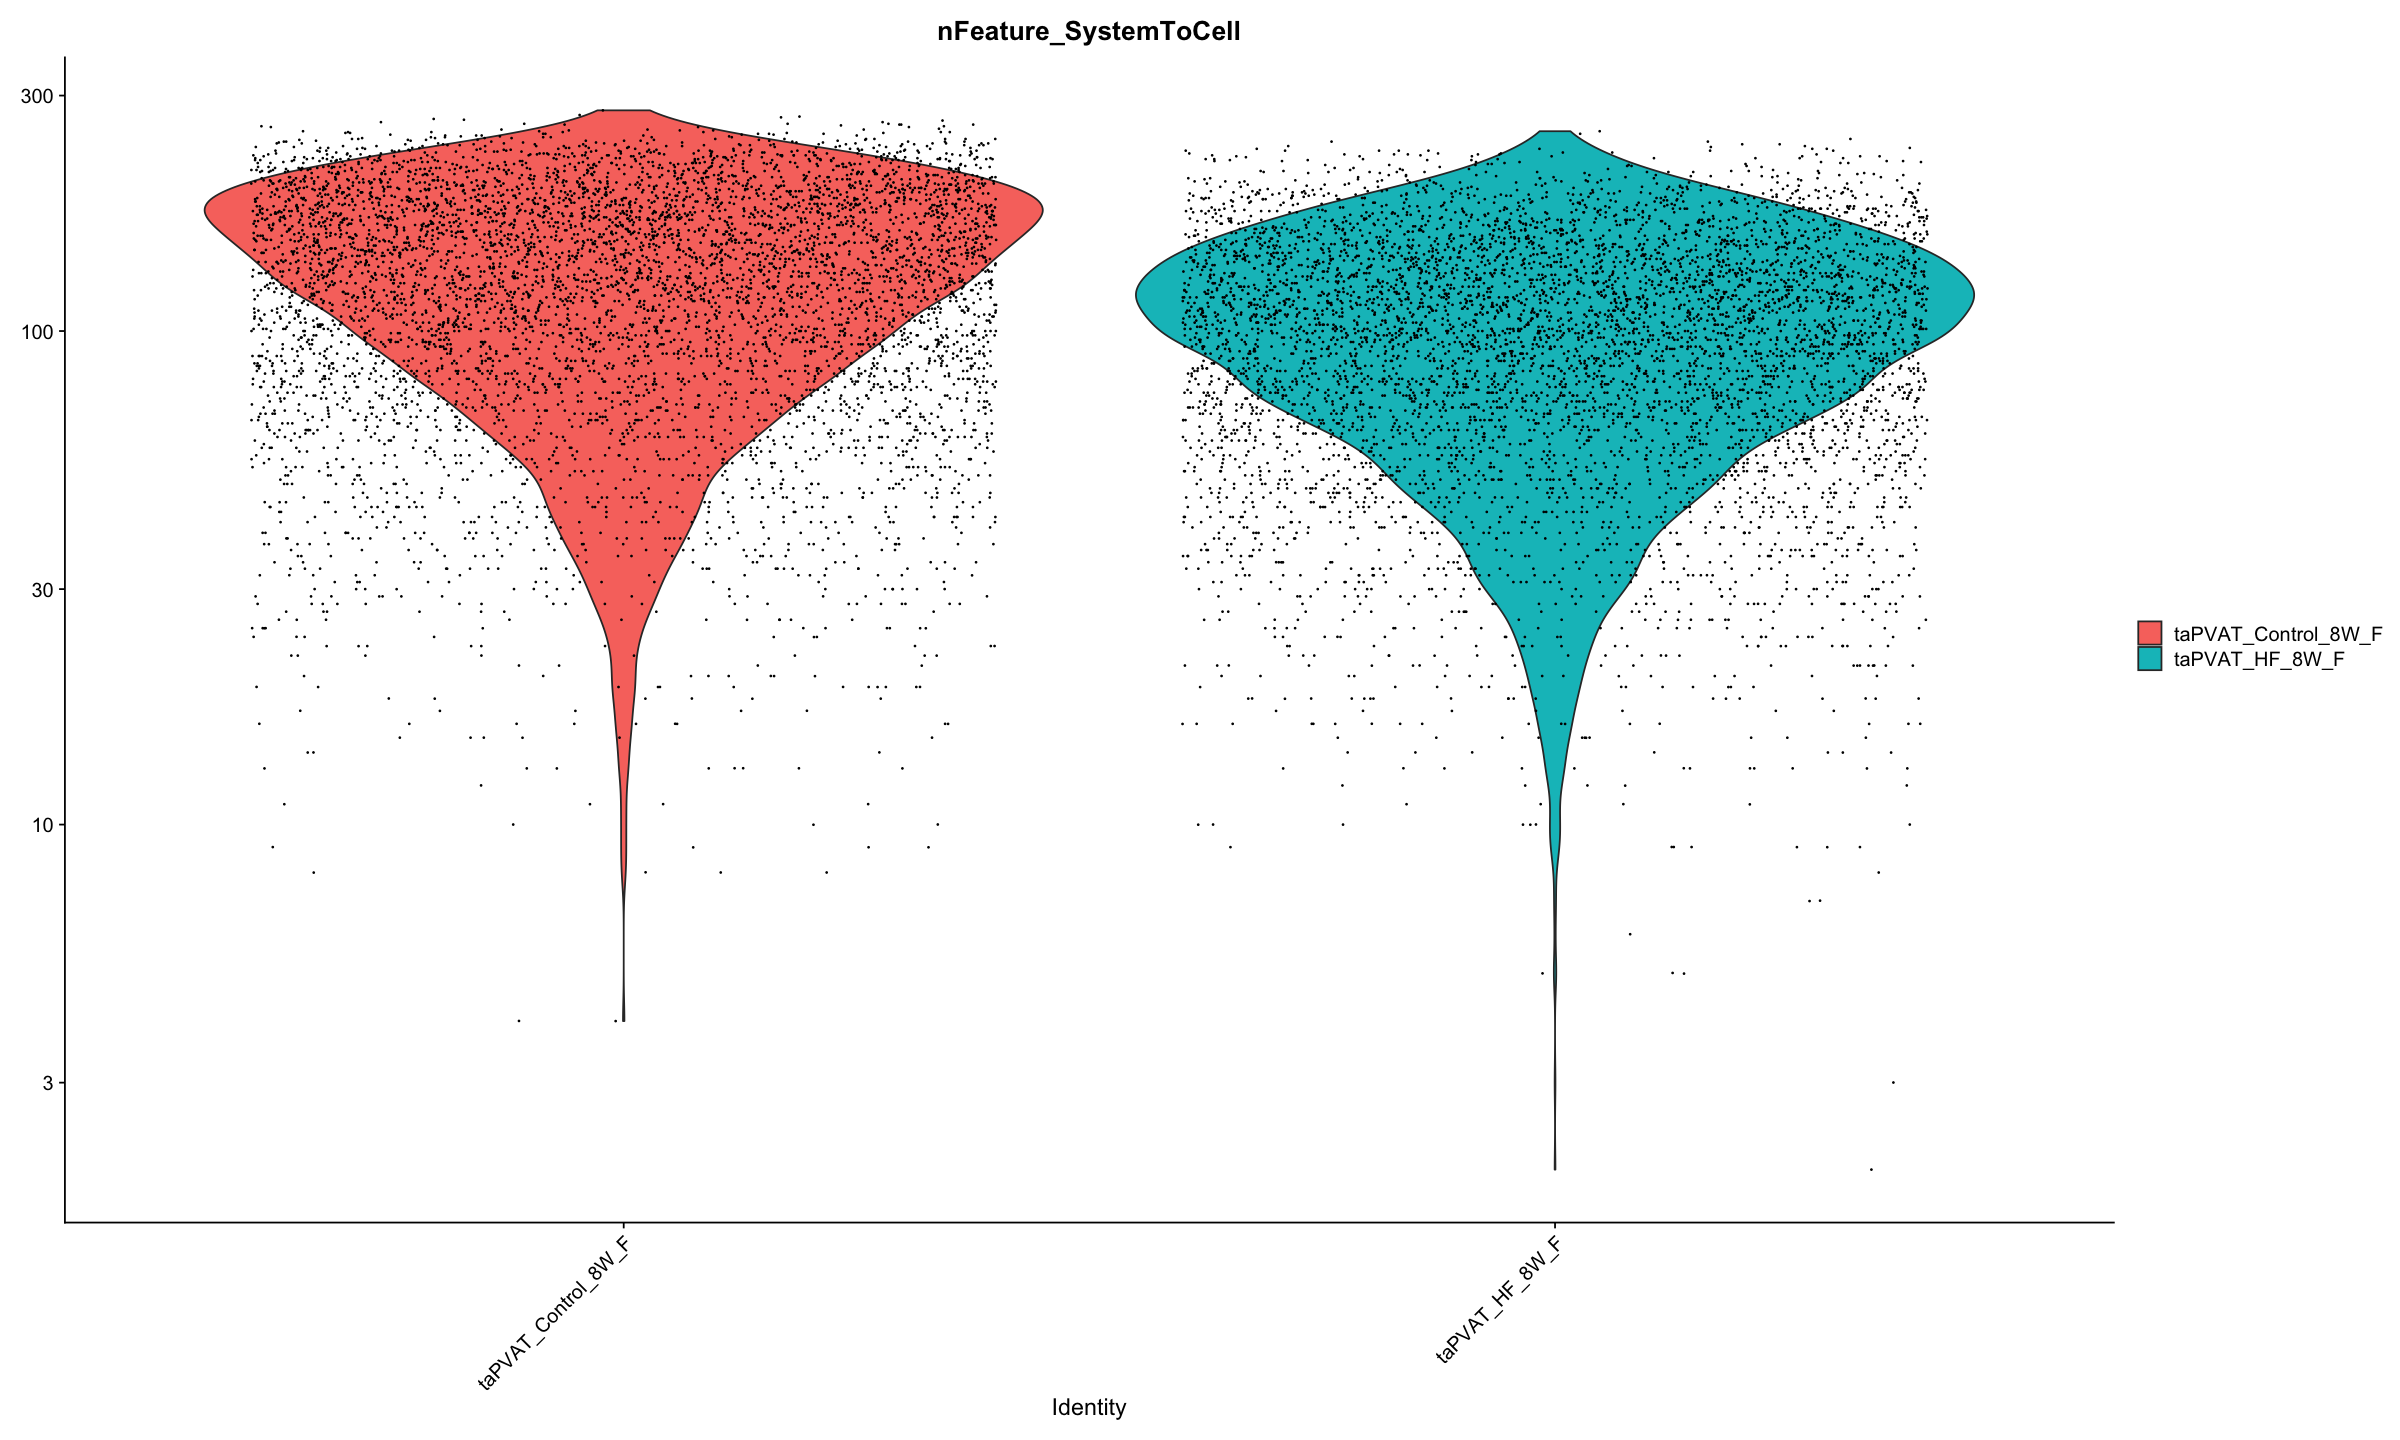

In [19]:
# Merge together
scc.merge <- merge(temp.list[[1]],temp.list[2])

# Clean up low-information crosses (connectivity data can be very sparse)
VlnPlot(scc.merge,features = 'nFeature_SystemToCell',group.by = 'Condition',pt.size=0.1,log = T)

In [20]:
scc.sub <- subset(scc.merge,nFeature_SystemToCell > 5) # Requesting at least 5 distinct ligand-receptor interactions per measurement

Centering and scaling data matrix

Finding variable features for layer data.1

Finding variable features for layer data.2

PC_ 1 
Positive:  Fbn1—Itgb1, Adam12—Itgb1, Col3a1—Itgb1, Lama2—Itgb1, Lamc1—Itgb1, Col1a2—Itgb1, Adam9—Itgb1, Hspg2—Itgb1, Col5a2—Itgb1, Col6a2—Itgb1 
	   Col18a1—Itgb1, Col1a1—Itgb1, Lama5—Itgb1, Tgm2—Itgb1, Adam15—Itgb1, Col4a5—Itgb1, Vcam1—Itgb1, Vcan—Itgb1, Sema7a—Itgb1, Col4a6—Itgb1 
	   Col4a3—Itgb1, Col4a1—Itgb1, Cxcl12—Itgb1, Vegfc—Itgb1, Lamb1—Itgb1, Nid1—Itgb1, Lamb3—Itgb1, Fbln1—Itgb1, Col6a1—Itgb1, F13a1—Itgb1 
Negative:  F8—Lrp1, Lpl—Lrp1, Tfpi—Lrp1, Psap—Lrp1, Serpine1—Lrp1, Hspg2—Ptprs, Apoe—Lrp1, Fgf1—Fgfr1, App—Lrp1, Lrpap1—Lrp1 
	   Plat—Lrp1, Serping1—Lrp1, Nrg2—Erbb4, Egf—Erbb4, Pdgfb—Lrp1, Adam17—Erbb4, Nrg4—Erbb4, Serpine2—Lrp1, Fgf18—Fgfr1, Nrg3—Erbb4 
	   Dcn—Erbb4, Calr—Lrp1, Nrg1—Erbb4, Hsp90b1—Lrp1, Ntf3—Ntrk3, Fgf1—Nrp1, Gnas—Adrb3, Rtn4—Cntnap1, Fgf13—Fgfr1, Ltbp3—Itgb5 
PC_ 2 
Positive:  Igfbp4—Lrp6, Dkk2—Lrp6, Rspo1—Lrp6, Rspo3—Lrp6,

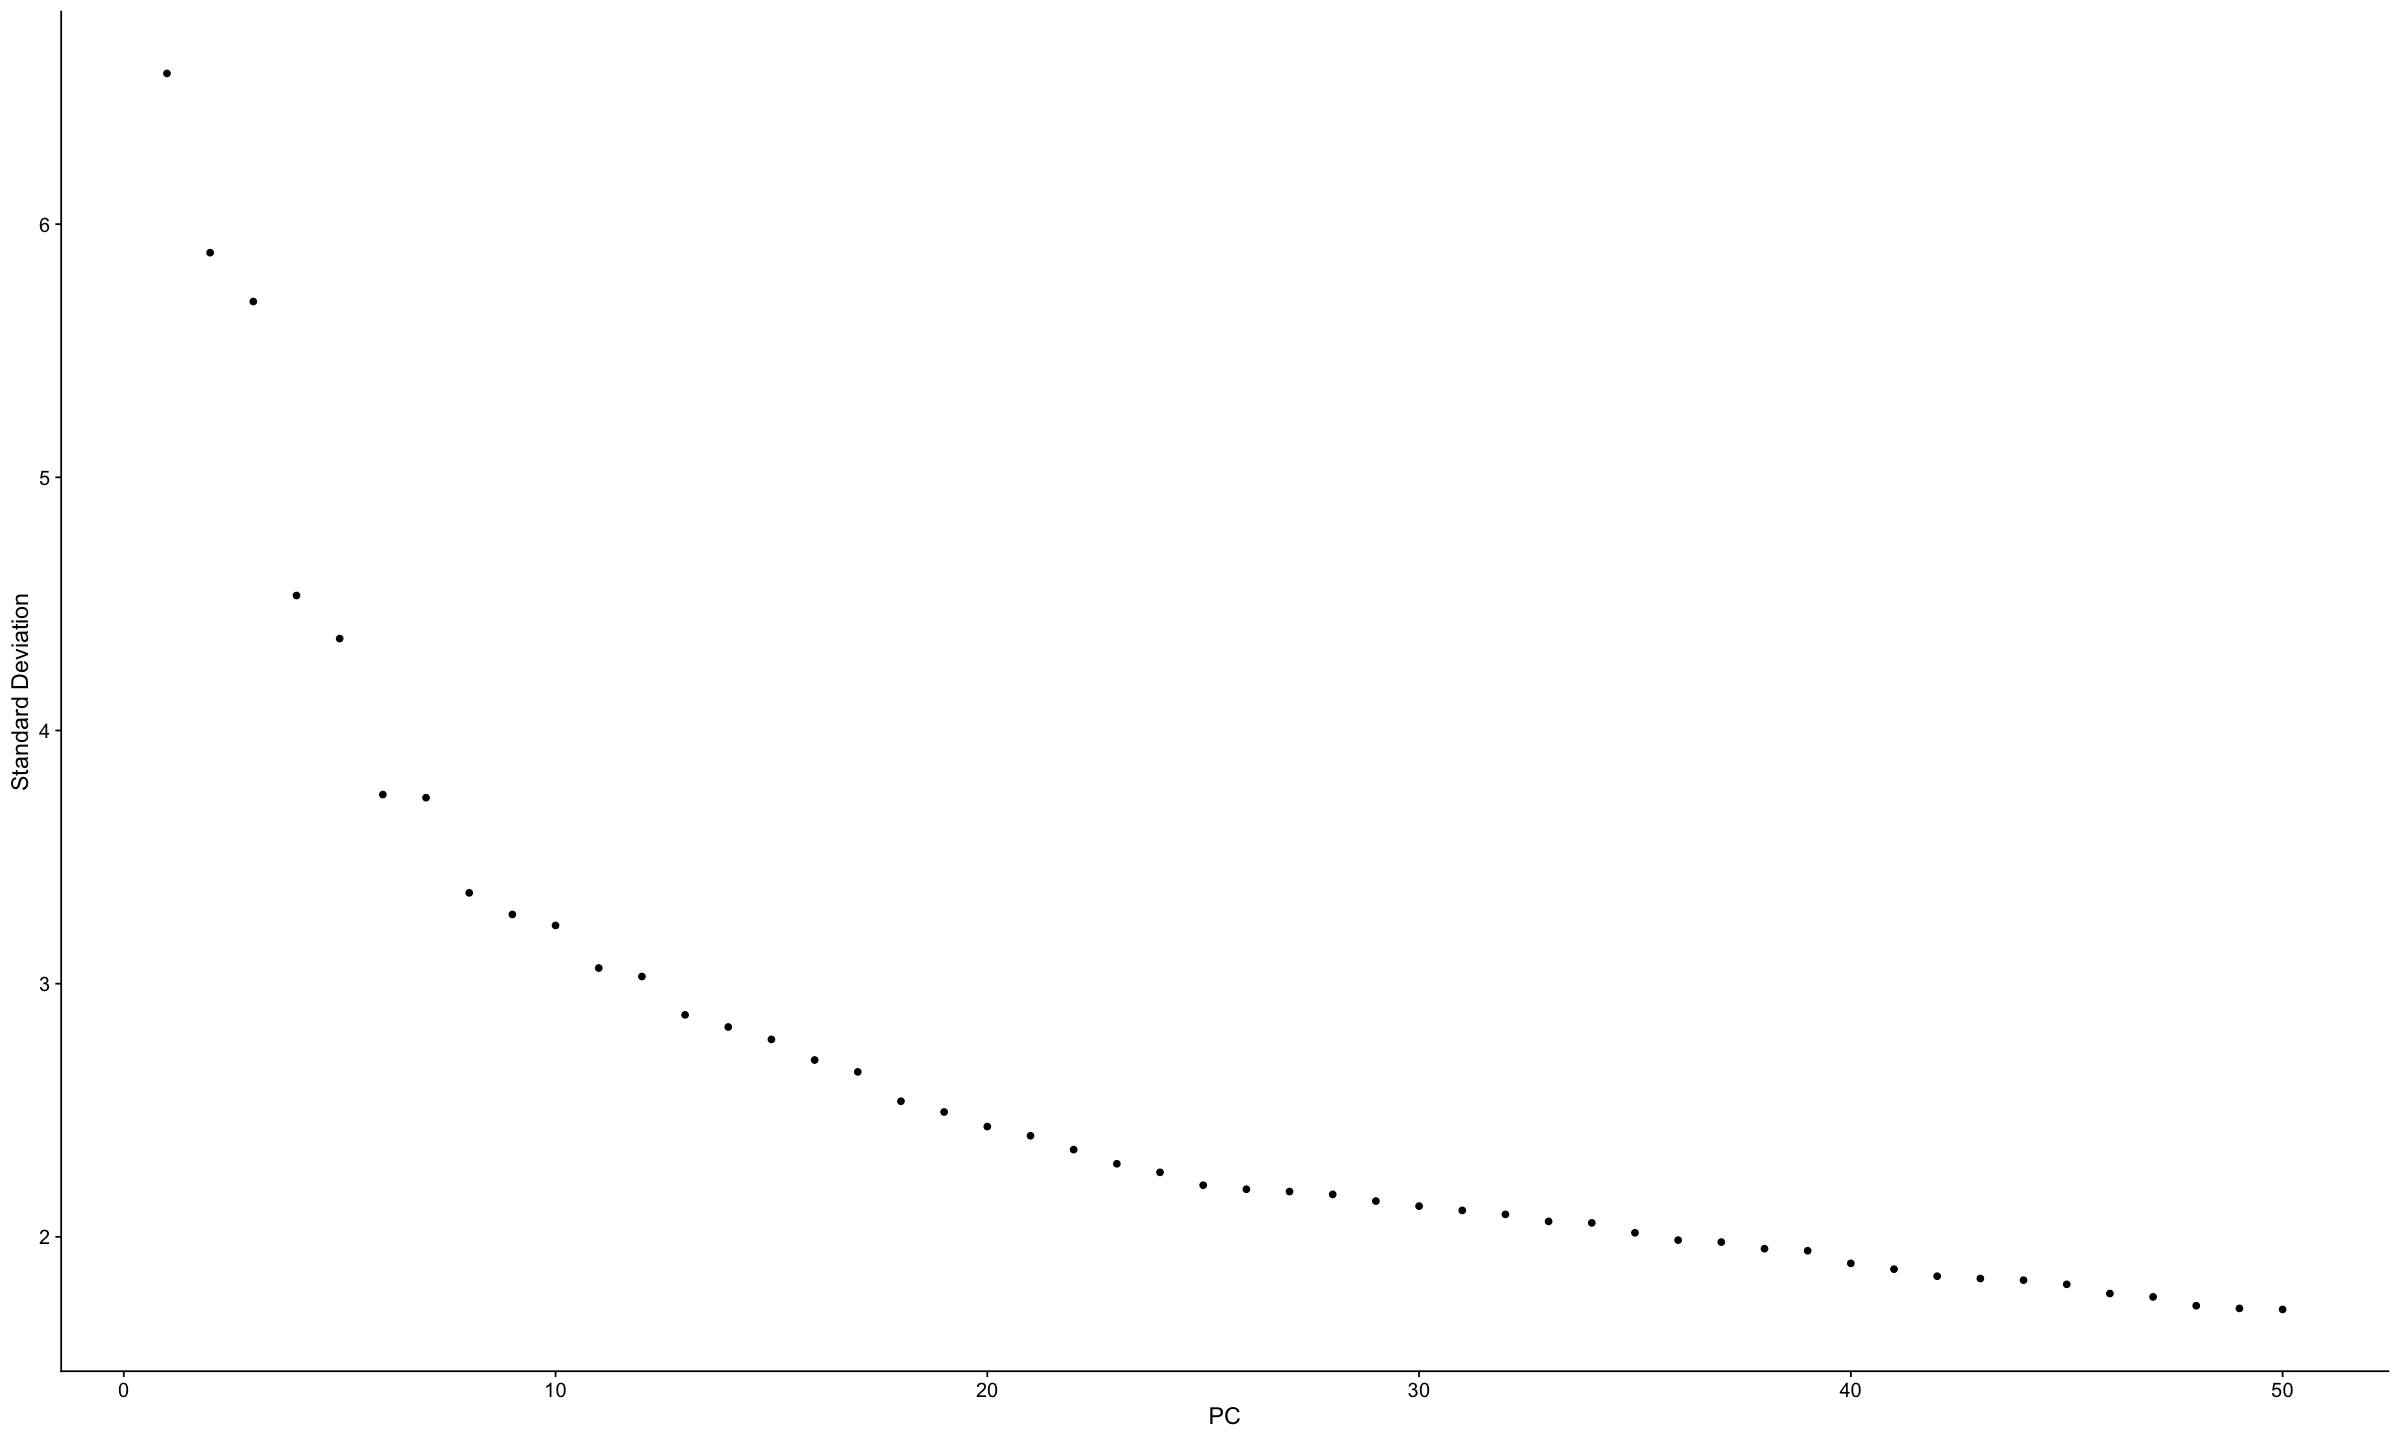

In [21]:
# Perform initial visualization
scc.sub <- ScaleData(scc.sub)
scc.sub <- FindVariableFeatures(scc.sub,selection.method = "disp")
scc.sub <- RunPCA(scc.sub,npcs = 50)
ElbowPlot(scc.sub,ndim=50)

12:44:07 UMAP embedding parameters a = 0.9922 b = 1.112

12:44:07 Read 12620 rows and found 10 numeric columns

12:44:07 Using Annoy for neighbor search, n_neighbors = 30

12:44:07 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:44:08 Writing NN index file to temp file /var/folders/kk/5gbzbkc93xb_g56p3bt9t8gh0000gp/T//RtmpoODkoP/file96624e6b16d0

12:44:08 Searching Annoy index using 1 thread, search_k = 3000

12:44:11 Annoy recall = 100%

12:44:12 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

12:44:12 Initializing from normalized Laplacian + noise (using RSpectra)

12:44:13 Commencing optimization for 200 epochs, with 486568 positive edges

12:44:24 Optimization finished



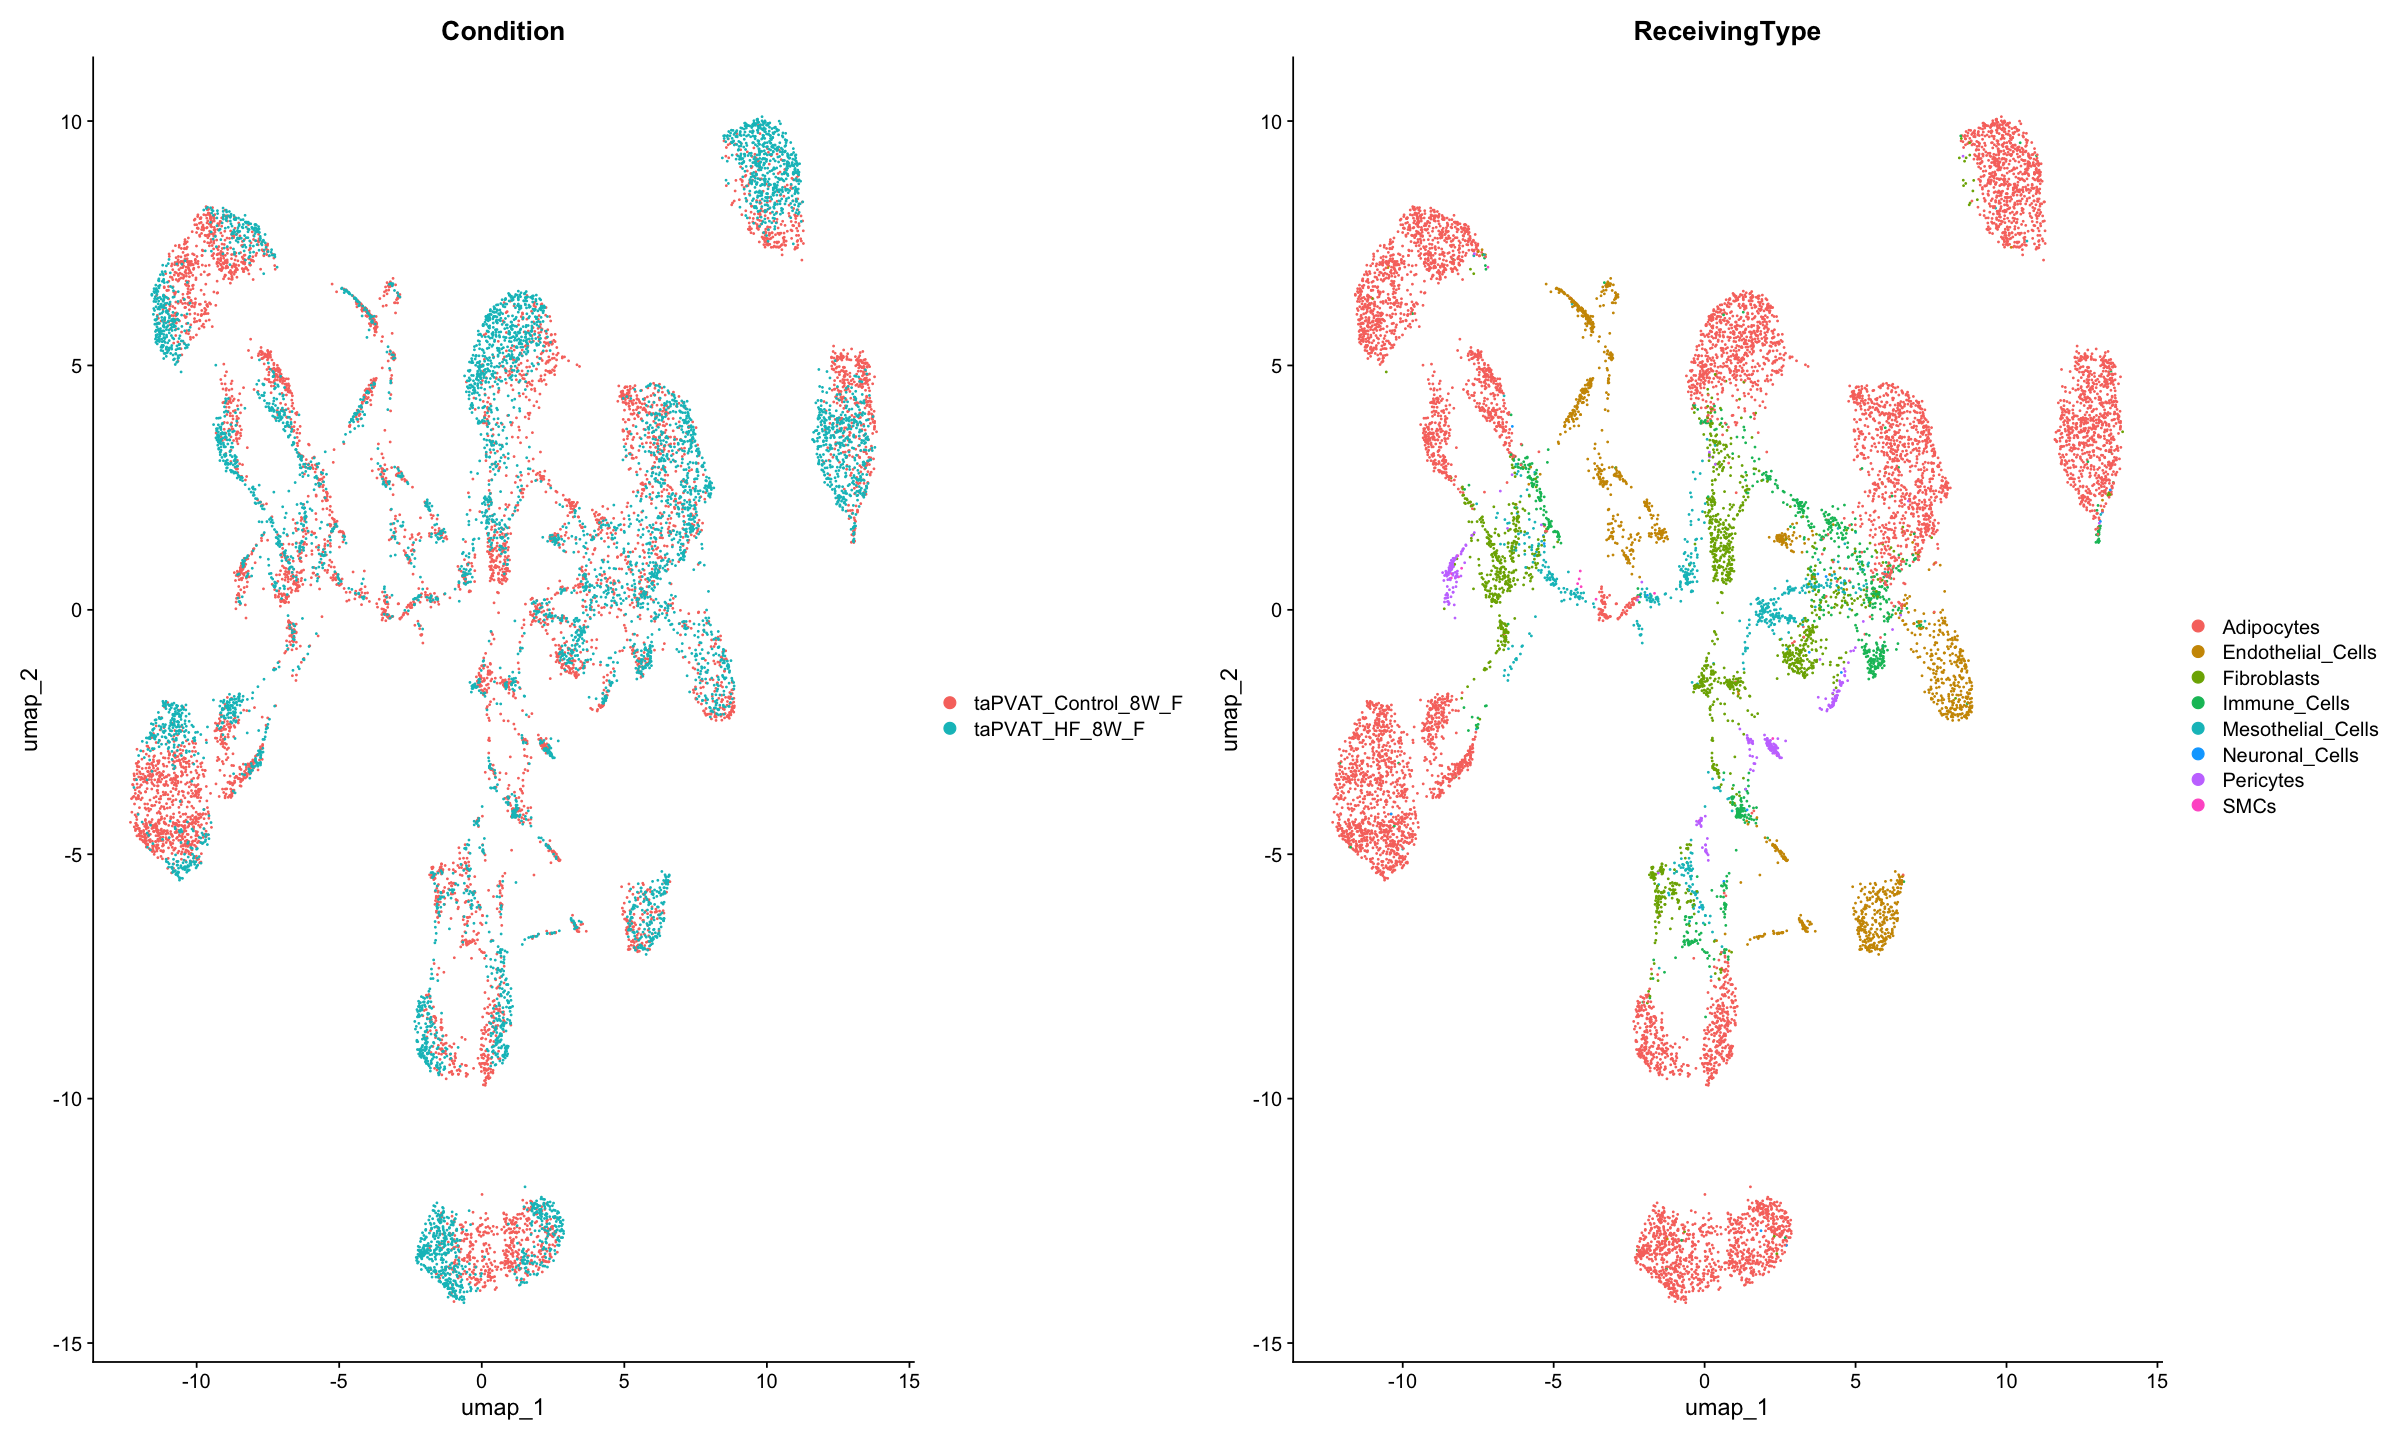

In [22]:
scc.sub <- RunUMAP(scc.sub,dims = 1:10)
p1 <- DimPlot(scc.sub,group.by = 'Condition')
p2 <- DimPlot(scc.sub,group.by = 'ReceivingType')
plot_grid(p1,p2)

In [23]:
unique(scc.sub@meta.data$ReceivingType)
COI <- "Adipocytes"

[1] "Adipocytes"        "Fibroblasts"       "Endothelial_Cells"
[4] "Immune_Cells"      "Pericytes"         "Mesothelial_Cells"
[7] "SMCs"              "Neuronal_Cells"

In [24]:
results <- lapply(COI, function(x){
 
  #subset
  subs <- subset(scc.sub, subset = ReceivingType == x)

  subs <- JoinLayers(subs, layers = c("data", "scale.data"))
  
  #print number of cells per condition
  print(paste0(x , ":  taPVAT_Control_8W_F:", sum(subs@meta.data$Condition == "taPVAT_Control_8W_F")))
  print(paste0(x , ":  taPVAT_HF_8W_F:", sum(subs@meta.data$Condition == "taPVAT_HF_8W_F")))
  
  #set idents
  Idents(subs) <- subs@meta.data$Condition
  
  #scale the subsetted data
  FindVariableFeatures(subs,assay='SystemToCell',selection.method = "disp")
  ScaleData(subs, assay='SystemToCell')
  
  #find markers (here we use ROC)
  markers <- FindAllMarkers(subs, test.use = "roc",assay='SystemToCell',
                            min.pct = 0.1,logfc.threshold = 0.1,
                            return.thresh = 0.1,only.pos = T)
  print(markers)
  
  #subset to top 10 markers per condition
  top10 <- markers %>% group_by(cluster) %>% top_n(n = 10, wt = myAUC)
  list(subs = subs, top10 = top10)
  
  #Make a heatmap
  #DoHeatmap(subs,group.by="ident",features=top10$gene, assay="SystemToCell") +  ggtitle("Top DE SystemToCell Mechanisms, CTRL vs STIM: ",x)
 
  
})

options(repr.plot.width=20, repr.plot.height=12)
options(warn=-1)

subs <- results[[1]]$subs
top10 <- results[[1]]$top10

[1] "Adipocytes:  taPVAT_Control_8W_F:3788"
[1] "Adipocytes:  taPVAT_HF_8W_F:4188"


Finding variable features for layer data

Centering and scaling data matrix

Calculating cluster taPVAT_Control_8W_F

Calculating cluster taPVAT_HF_8W_F



                 myAUC     avg_diff power avg_log2FC pct.1 pct.2
Fgf2—Nrp1        0.962 0.0602885129 0.924  8.0298959 0.924 0.000
Rspo3—Lrp6       0.926 0.0703925524 0.852  0.9943952 0.950 0.933
Cntn4—Ptprg      0.879 0.0494171853 0.758  7.7364948 0.758 0.000
Fgf2—Fgfr1       0.840 0.0255248092 0.680  6.7731980 0.680 0.000
Fgf14—Fgfr1      0.840 0.0307679964 0.680  7.0440091 0.680 0.000
Rspo1—Lrp6       0.819 0.0411981075 0.638  0.4717431 0.950 0.933
Sema3e—Nrp1      0.812 0.0572354708 0.624  0.5714714 0.924 0.896
Bmp5—Bmpr2       0.812 0.0312719771 0.624  7.0676167 0.624 0.000
Fgf7—Nrp1        0.796 0.0787672795 0.592  0.5457570 0.924 0.896
Tgfb1—Tgfbr3     0.779 0.0527477136 0.558  1.0990289 0.803 0.712
Ptn—Ptprs        0.769 0.0213085943 0.538  6.5125994 0.538 0.000
Plg—Itgb1        0.739 0.0051061295 0.478  4.4947200 0.478 0.000
Lamc3—Itgb1      0.739 0.0660371175 0.478  8.1649328 0.478 0.000
Calm1—Insr       0.737 0.1774516307 0.474  1.2158738 0.740 0.556
Serpinc1—Lrp1    0.724 0.

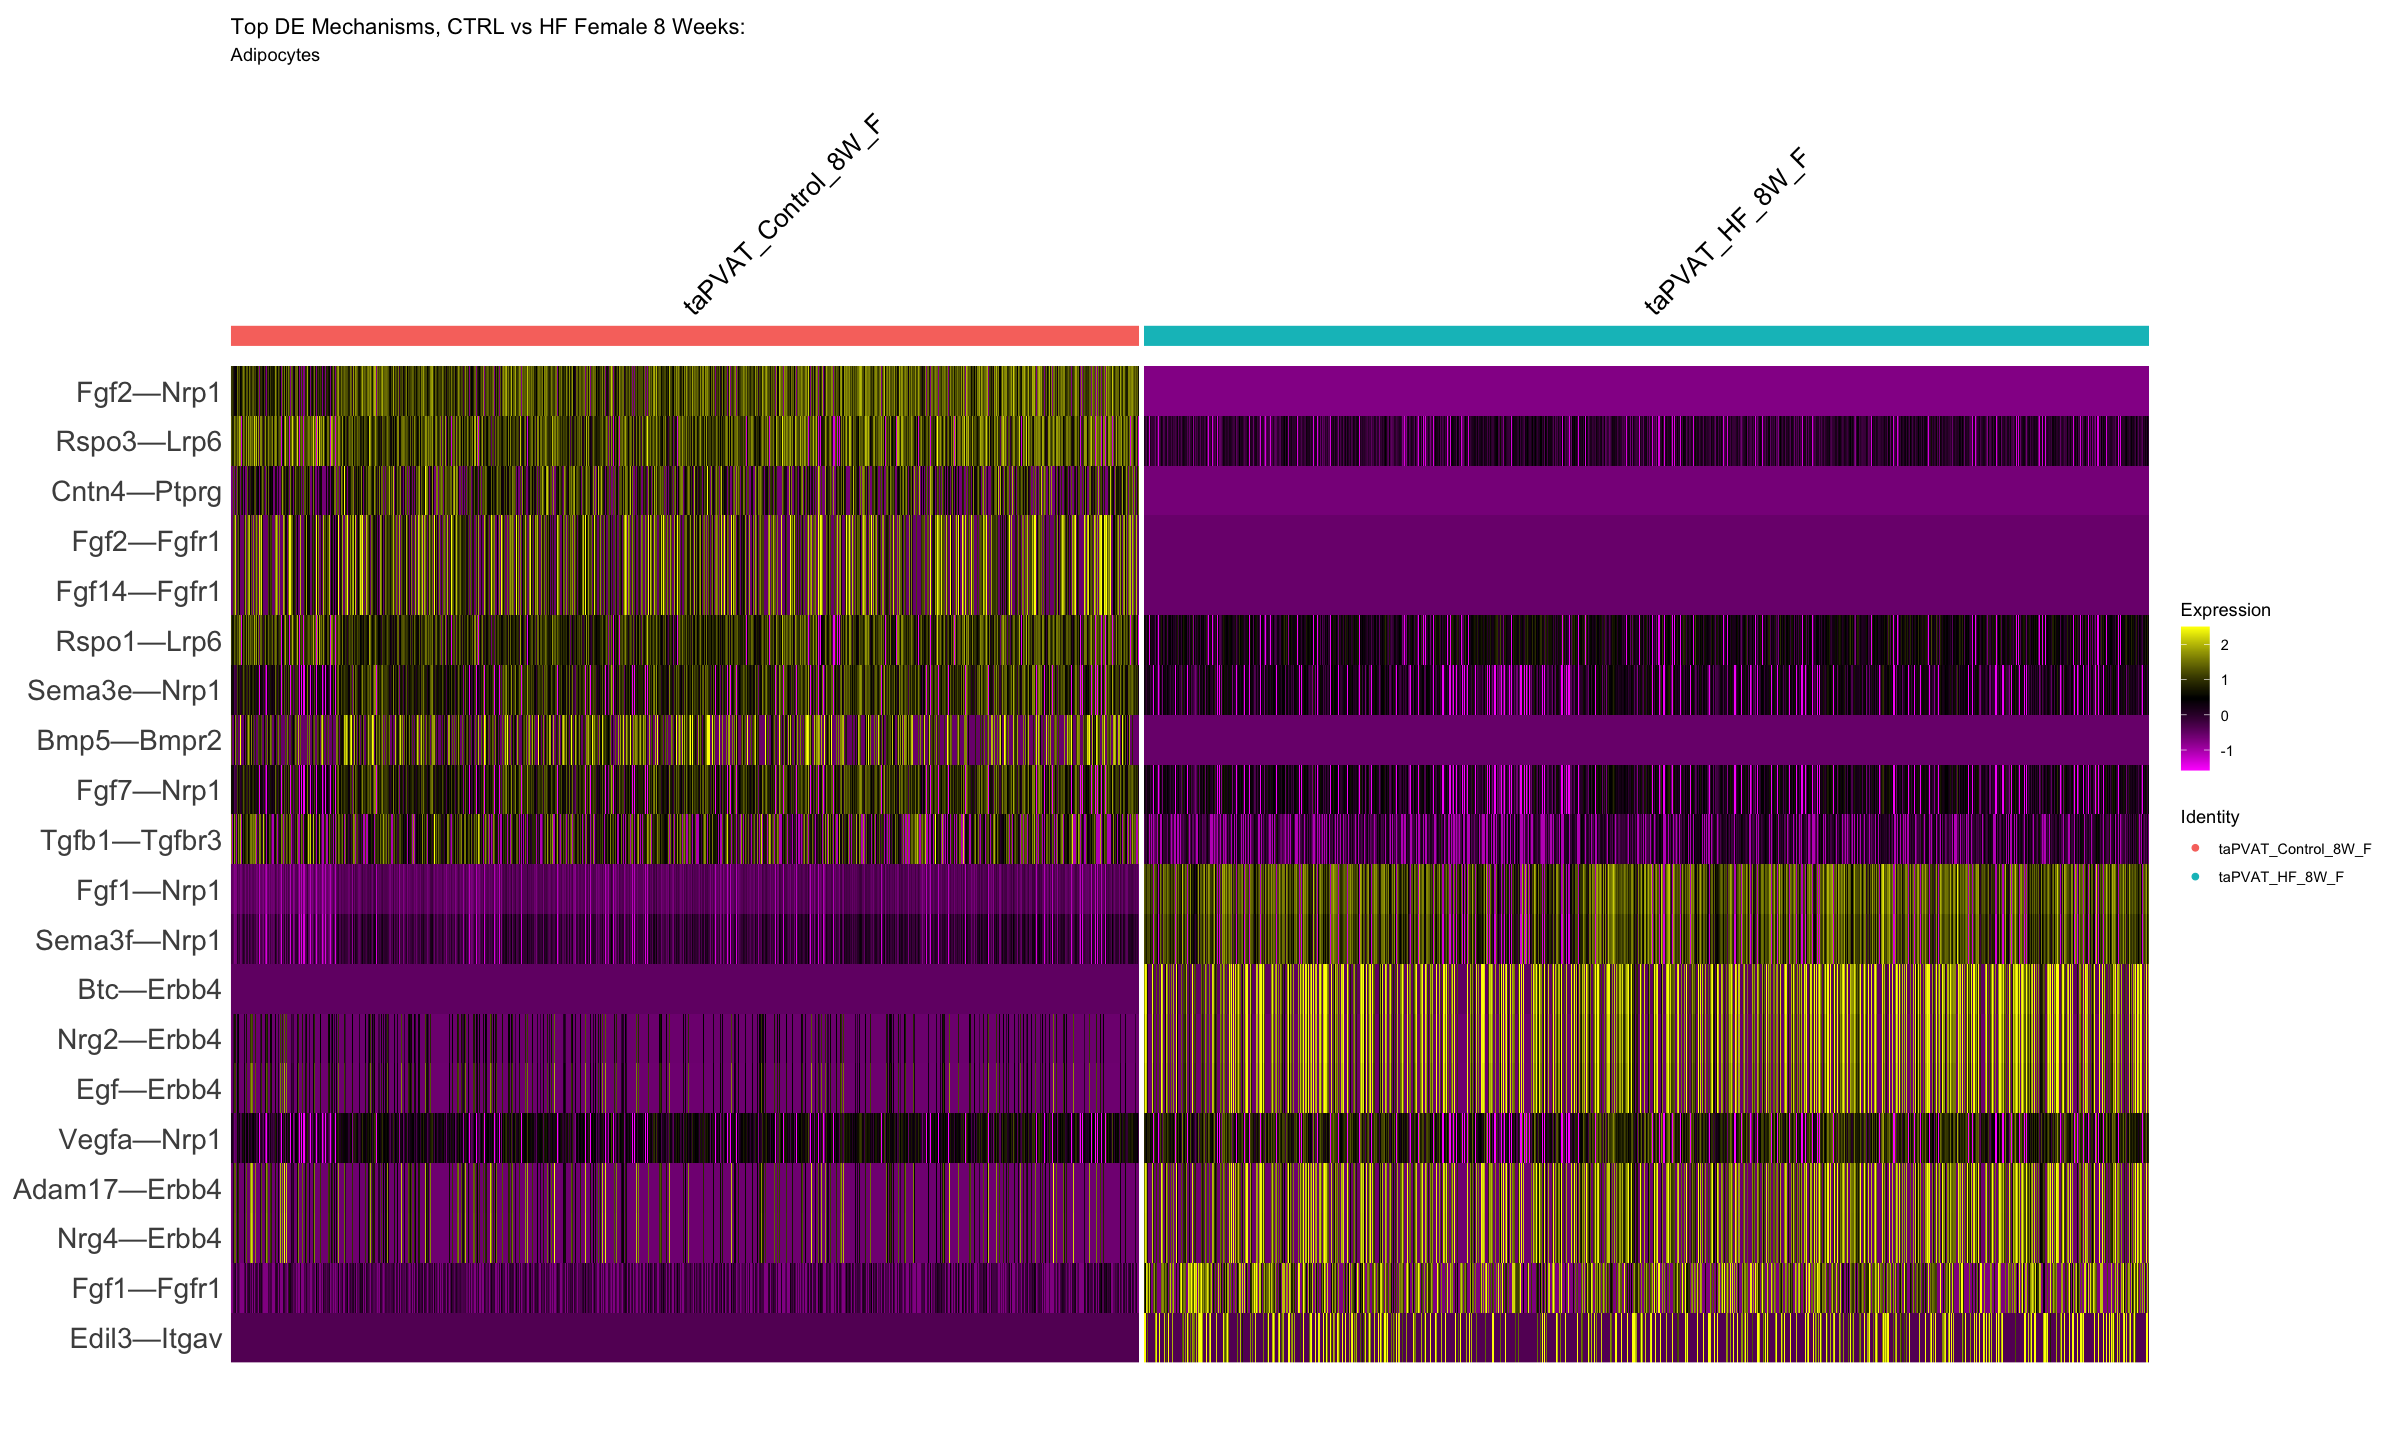

In [25]:
DoHeatmap(subs,group.by="ident",features=top10$gene, assay="SystemToCell") +  ggtitle("Top DE Mechanisms, CTRL vs HF Female 8 Weeks: ",COI) + theme(#axis.text.x = element_text(face = "italic", size = 20),
                                                                   axis.text.y = element_text(size = 17))
                                                                   #axis.title.x = element_text(size = 20),
                                                                   #axis.title.y = element_text(size = 20),
                                                                   #plot.title = element_text(hjust = 0.5))

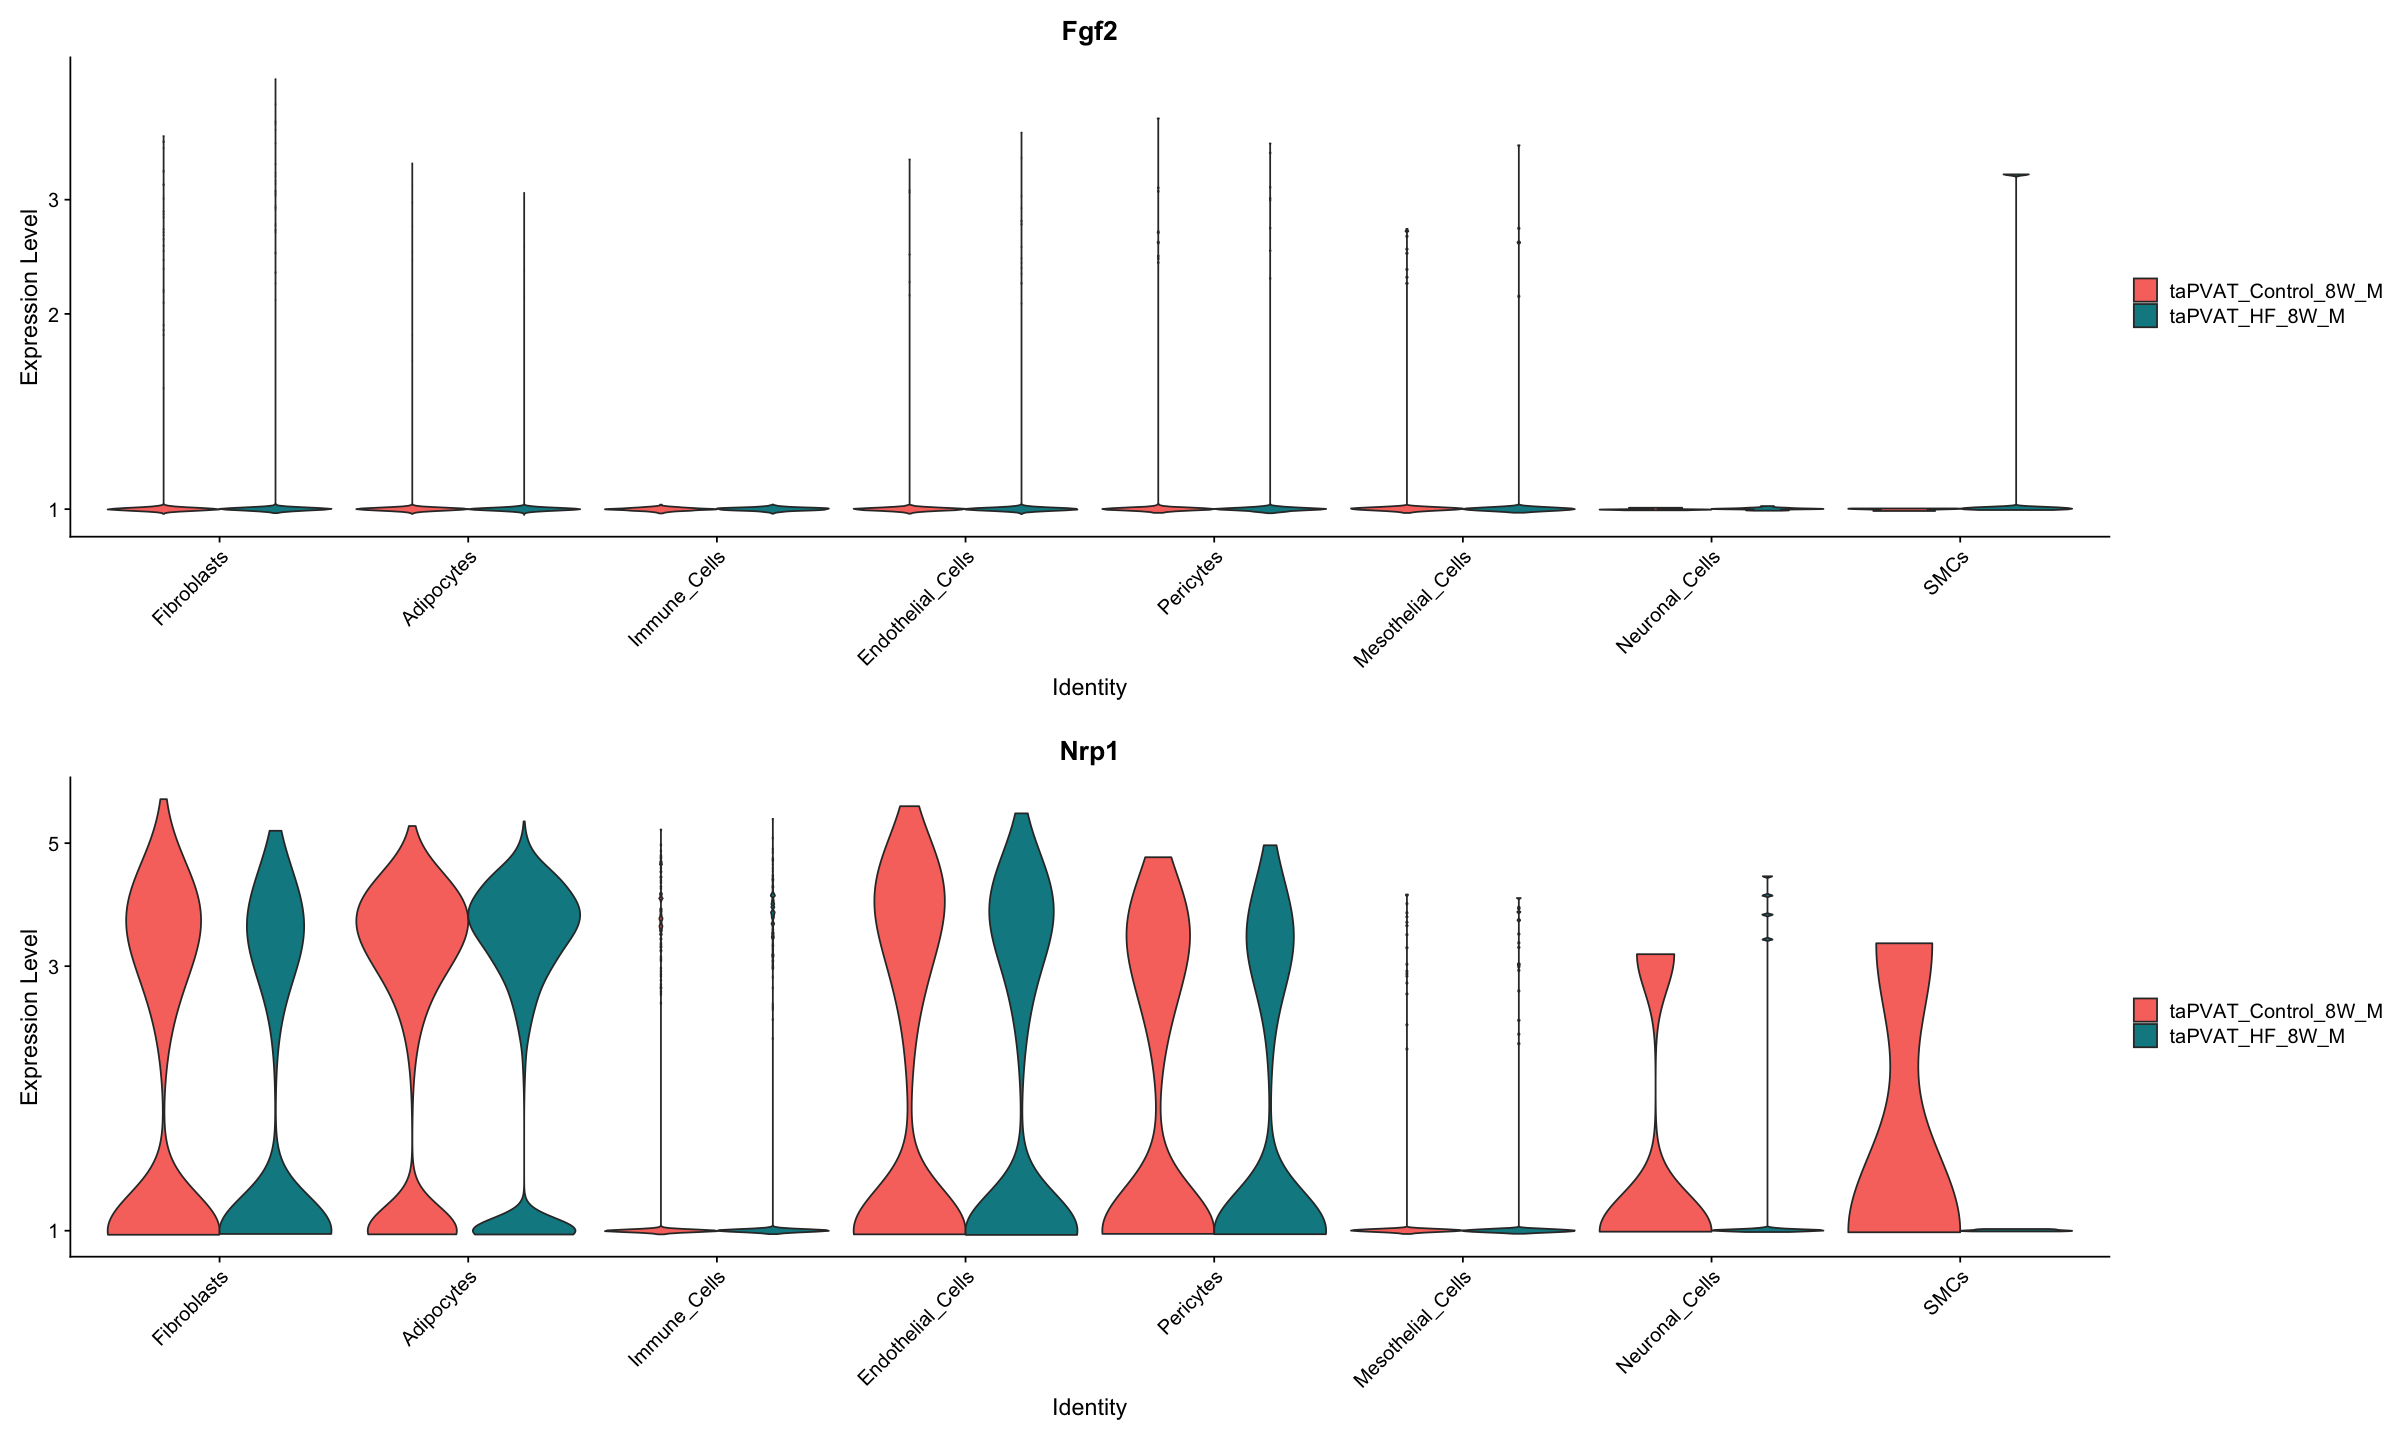

In [66]:
p1 <- VlnPlot(male_8weeks_rds,'Fgf2',split.by = 'sample_type',pt.size = 0,log=T)
p2 <- VlnPlot(male_8weeks_rds,'Nrp1',split.by = 'sample_type',pt.size = 0,log=T)
plot_grid(p1,p2,ncol=1)

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Rspo1—Lrp6' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Rspo1—Lrp6' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Rspo1—Lrp6' in 'mbcsToSbcs': dot substituted for <94>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Rspo1—Lrp6' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Rspo1—Lrp6' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Rspo1—Lrp6' in 'mbcsToSbcs': dot substituted for <94>”
Warning message in grid.Call(C_tex

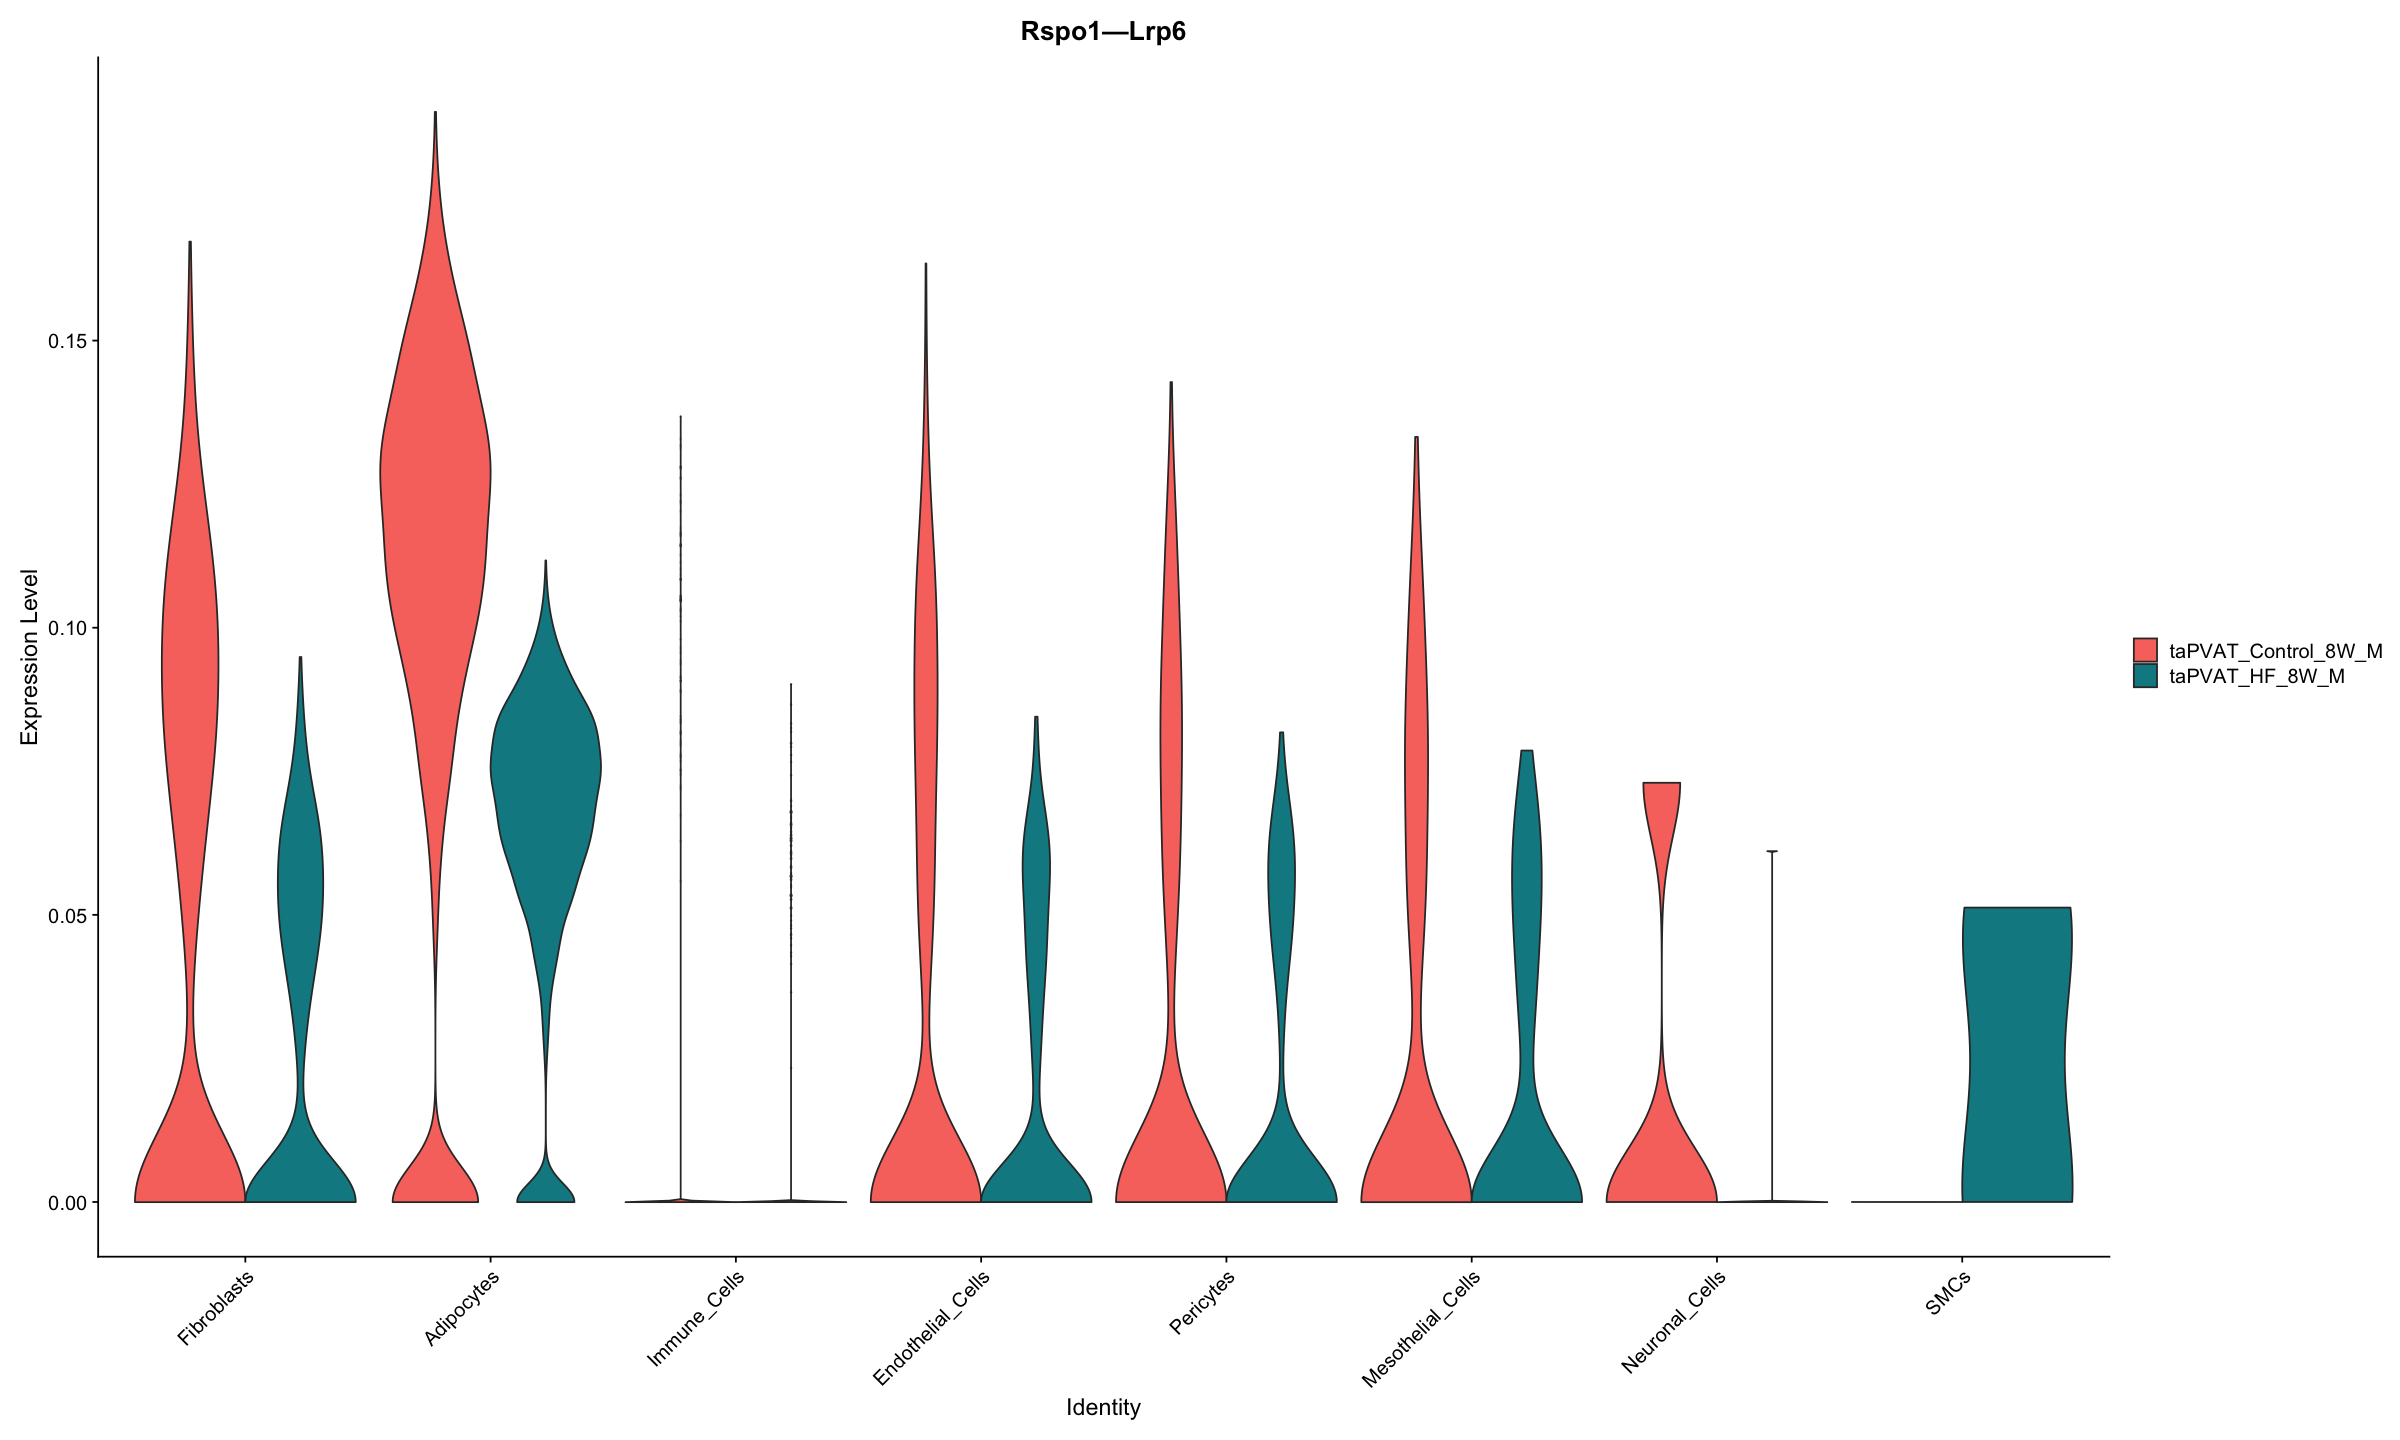

In [68]:
VlnPlot(scc.sub, 'Rspo1—Lrp6',split.by = 'Condition',pt.size = 0)

Centering and scaling data matrix

Warning message:
“Different features in new layer data than already exists for scale.data”
PC_ 1 
Positive:  Tfpi—Lrp1, Calr—Lrp1, Serpine2—Lrp1, App—Lrp1, F8—Lrp1, Psap—Lrp1, Hsp90b1—Lrp1, Lpl—Lrp1, Plat—Lrp1, Lrpap1—Lrp1 
	   Nxph1—Nrxn1, Serping1—Lrp1, Psen1—Notch1, Mfap5—Notch1, Dll1—Notch1, Uba52—Notch1, Dll4—Notch1, Adam17—Notch1, Jag1—Notch1, Jag2—Notch1 
	   Rarres2—Cmklr1, Pdgfb—Lrp1, Ptn—Ptprs, Calr—Tshr, Apoe—Lrp1, Gnas—Tshr, Fn1—Tshr, Hspg2—Ptprs, Gnai2—Tshr, Icam1—Egfr 
Negative:  Lama2—Itgb1, Col1a1—Itgb1, Lamc1—Itgb1, Nid1—Itgb1, Col6a2—Itgb1, Adam9—Itgb1, Lamb1—Itgb1, Vtn—Itgb1, Adam12—Itgb1, Fn1—Itgb1 
	   Col6a1—Itgb1, Fbn1—Itgb1, Col4a1—Itgb1, Cxcl12—Itgb1, Col5a2—Itgb1, Col6a3—Itgb1, Fbln1—Itgb1, Col18a1—Itgb1, Timp2—Itgb1, Col1a2—Itgb1 
	   Hspg2—Itgb1, Adam15—Itgb1, Lama5—Itgb1, Col3a1—Itgb1, Col4a4—Itgb1, Npnt—Itgb1, Reln—Itgb1, Tgm2—Itgb1, Vcan—Itgb1, Col4a5—Itgb1 
PC_ 2 
Positive:  Vegfc—Itgb1, Col4a5—Itgb1, Vcam1—Itgb1, Reln—

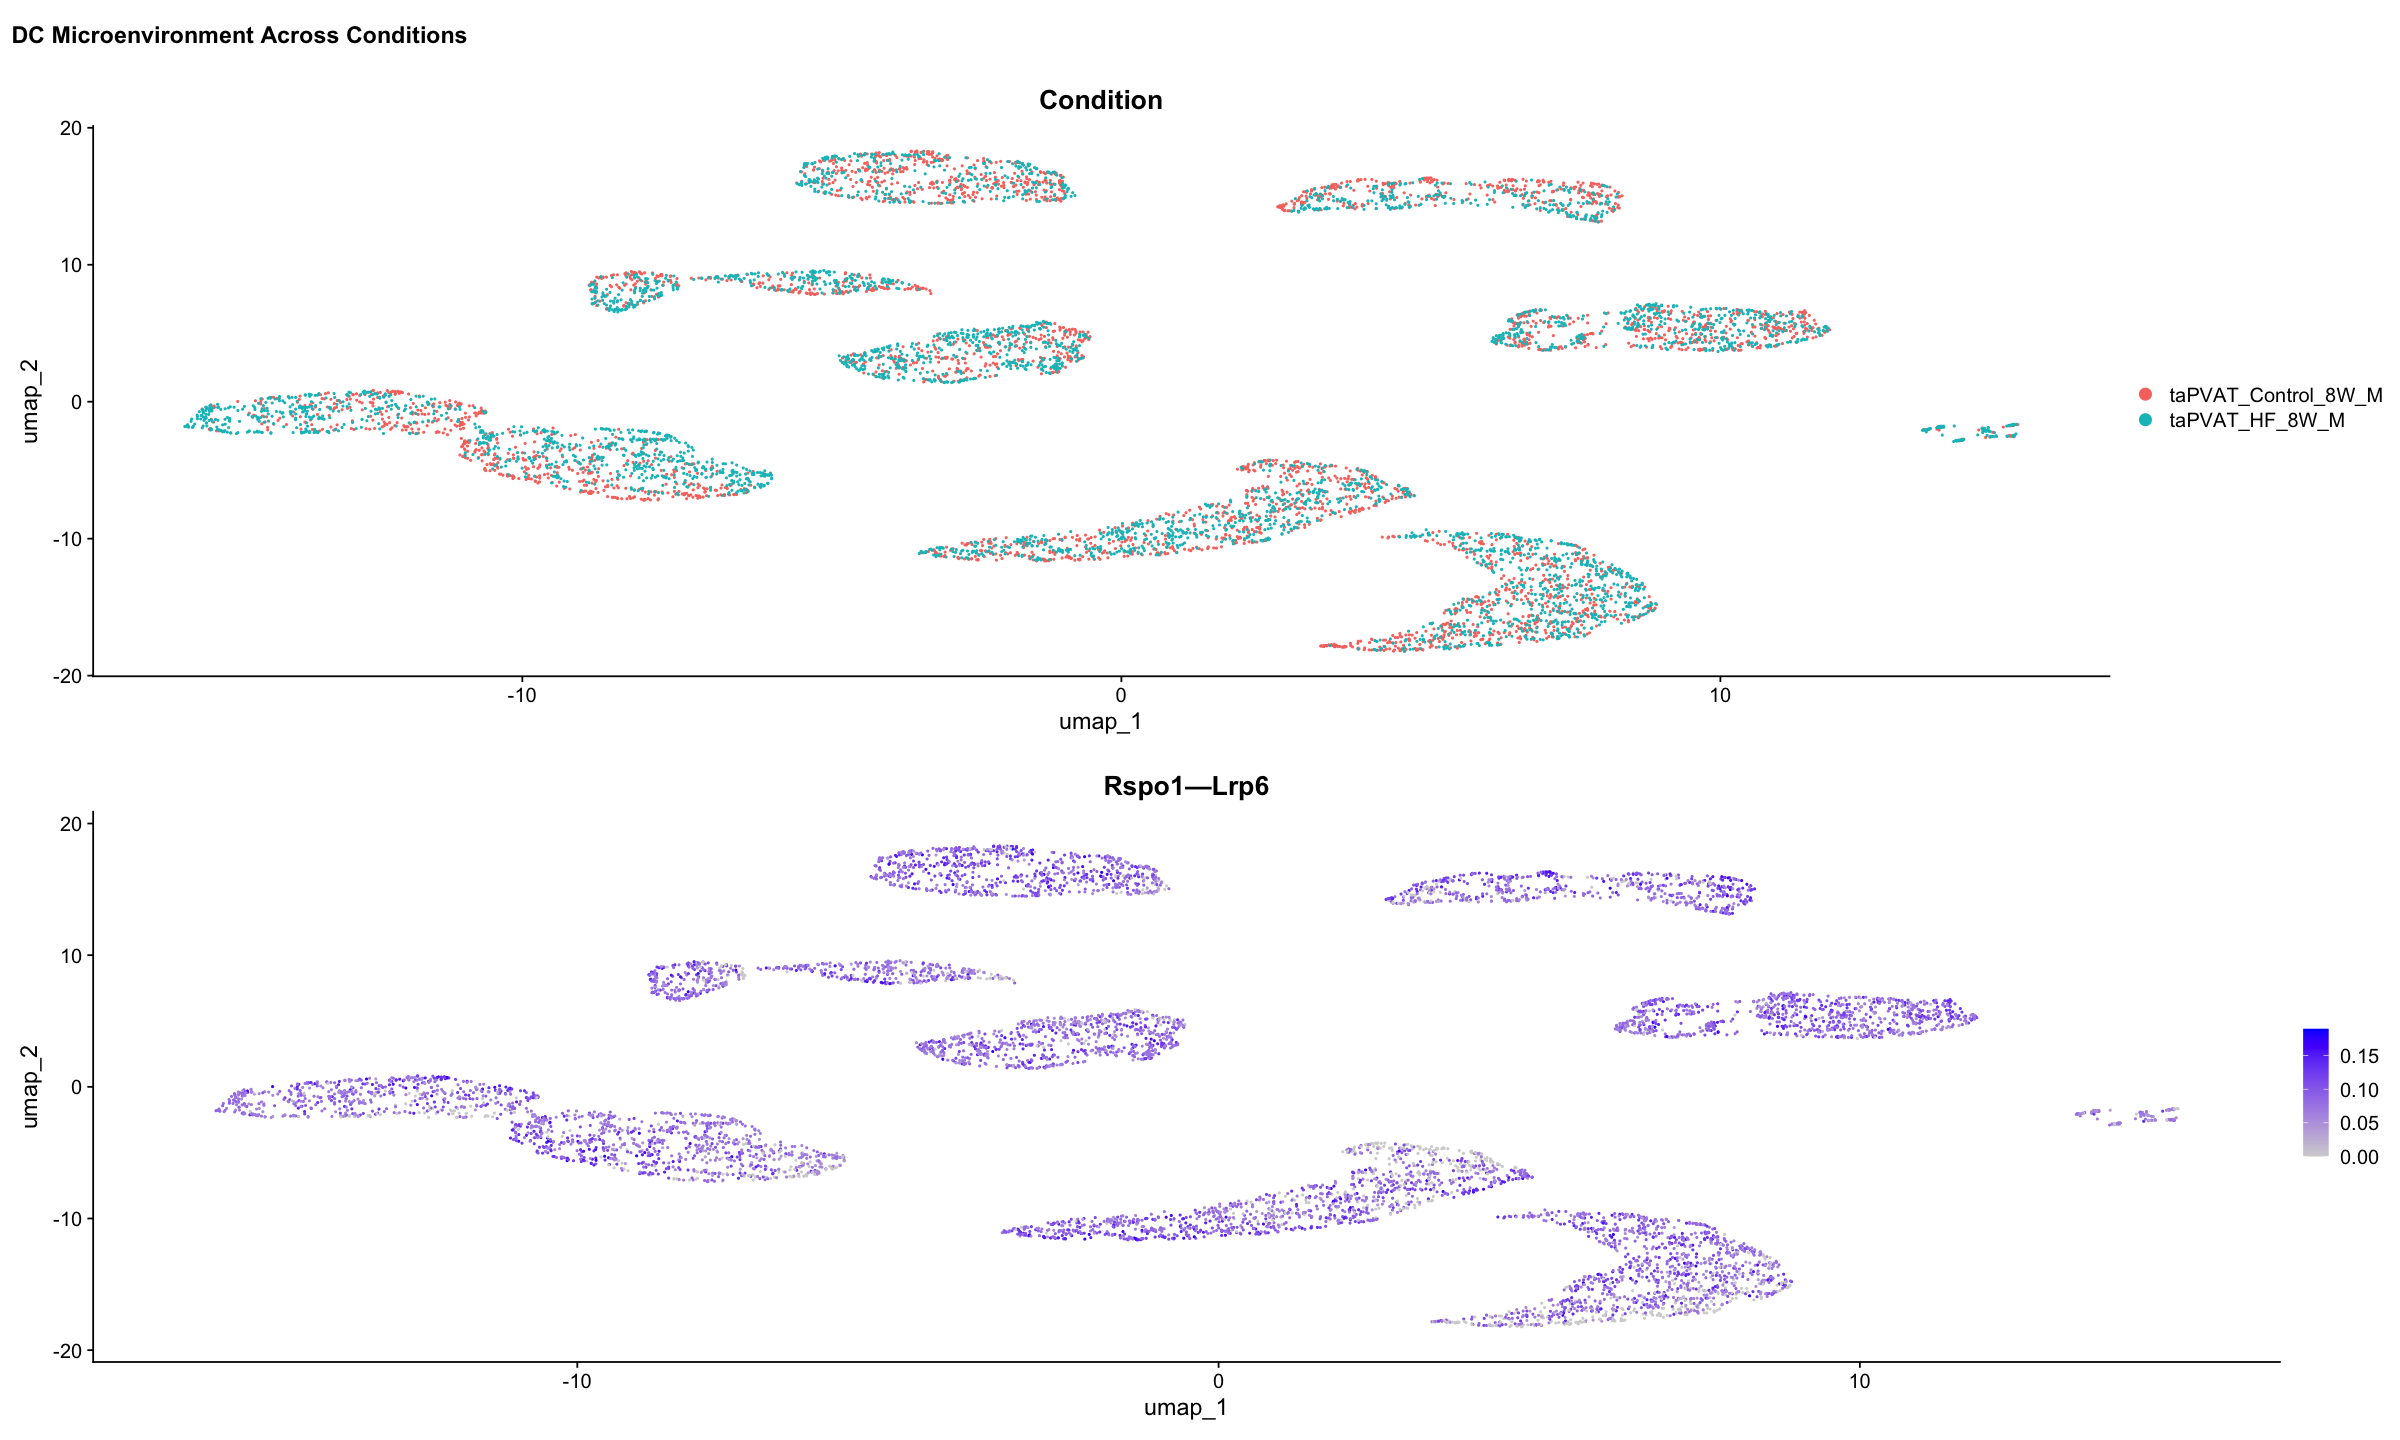

In [69]:
subs <- subset(scc.sub, idents = 'Adipocytes')
subs <- ScaleData(subs)
subs <- RunPCA(subs)
subs <- RunUMAP(subs,dims = 1:5)
p1 <- DimPlot(subs,group.by = 'Condition')
p2 <- FeaturePlot(subs,'Rspo1—Lrp6')
title <- ggdraw() + 
  draw_label(
    "DC Microenvironment Across Conditions",
    fontface = 'bold',
    x = 0,
    hjust = 0
  ) +
  theme(
    # add margin on the left of the drawing canvas,
    # so title is aligned with left edge of first plot
    plot.margin = margin(0, 0, 0, 7)
  )
plot_grid(title,p1,p2,ncol=1,rel_heights = c(0.1, 1,1))